In [24]:
# -*- encoding: utf-8 -*-

import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix

In [25]:
#Lendo os dados de entrada e separando os previsores das classes
credito = pd.read_csv('dados/Credit.csv')
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [26]:
#Apesar da árvore de decisão trabalhar com dados categóricos é melhor 
#arrumar os dados para numéricos com LabelEncoder

In [27]:
labelEncoder = LabelEncoder()
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,2] = labelEncoder.fit_transform(previsores[:,2])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = labelEncoder.fit_transform(previsores[:,5])
previsores[:,6] = labelEncoder.fit_transform(previsores[:,6])
previsores[:,8] = labelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = labelEncoder.fit_transform(previsores[:,9])
previsores[:,11] = labelEncoder.fit_transform(previsores[:,11])
previsores[:,13] = labelEncoder.fit_transform(previsores[:,13])
previsores[:,14] = labelEncoder.fit_transform(previsores[:,14])
previsores[:,16] = labelEncoder.fit_transform(previsores[:,16])
previsores[:,18] = labelEncoder.fit_transform(previsores[:,18])
previsores[:,19] = labelEncoder.fit_transform(previsores[:,19])

In [28]:
#Ajustando o dados de treinamento e validação/teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [29]:
#Gerando o modelo da árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
#Visualizar a árvore (Usar o arquivo em http://www.webgraphviz.com)
export_graphviz(arvore, out_file ='dados/tree.dot')

In [31]:
#Fazendo as previsões
previsoes = arvore.predict(x_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

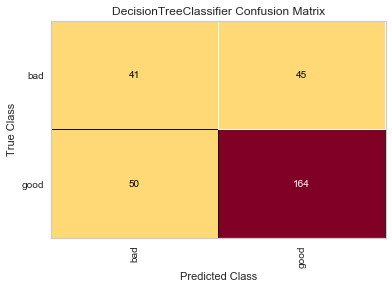

In [32]:
#Visualizando melhor os resultados com yellowbricks
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()